In [173]:
# necessary Imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [174]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [175]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [176]:
data.shape

(1338, 7)

In [177]:
#value count for categorical data
print(data.sex.value_counts(),'\n',data.children.value_counts(),'\n',data.smoker.value_counts(),'\n',data.region.value_counts(),'\n')

male      676
female    662
Name: sex, dtype: int64 
 0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64 
 no     1064
yes     274
Name: smoker, dtype: int64 
 southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64 



## reaplacing the categorical variable with numerical variable

In [178]:
data['sex']=data['sex'].map({'male':1,'female':0})
data['smoker']=data['smoker'].map({'yes':1,'no':0})
data['region']=data['region'].map({'southeast':0,'southwest':1,'northeast':3,'northwest':2})

In [179]:
data.head(10)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,0,3756.62160
6,46,0,33.440,1,0,0,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,3,6406.41070
9,60,0,25.840,0,0,2,28923.13692


## Exploratory Data Analysis

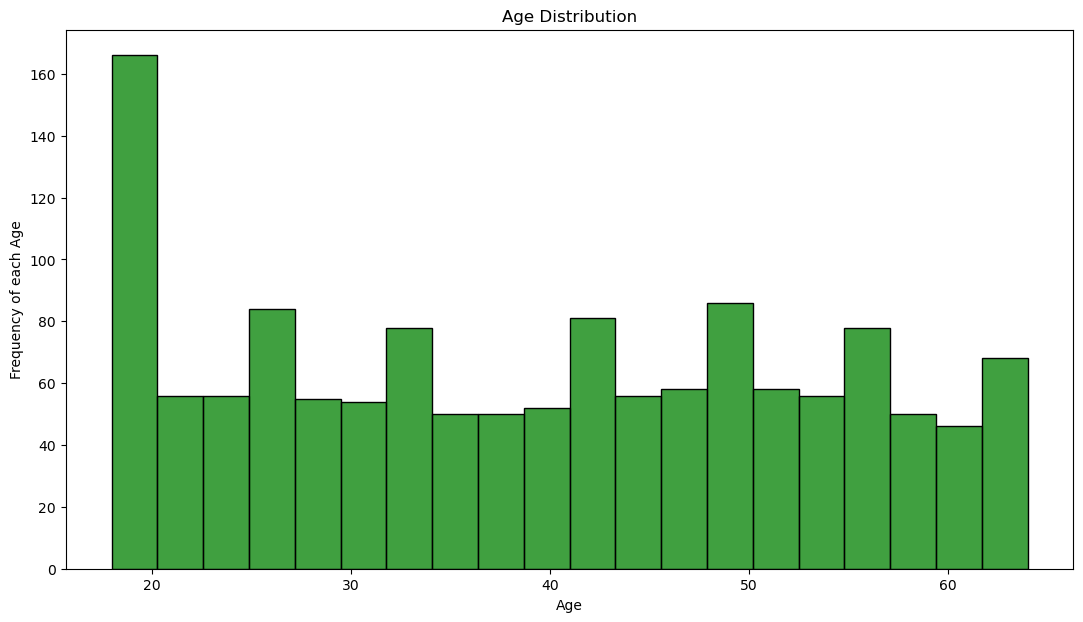

In [180]:
# checking age distribution
plt.figure(figsize=(13,7))
sns.histplot(data.age,bins=20,kde=False,color='green')

plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency of each Age')
plt.show()

#### Maximum people in a dataset  have an Age below 20

Text(0.5, 1.0, 'Gender Distribution')

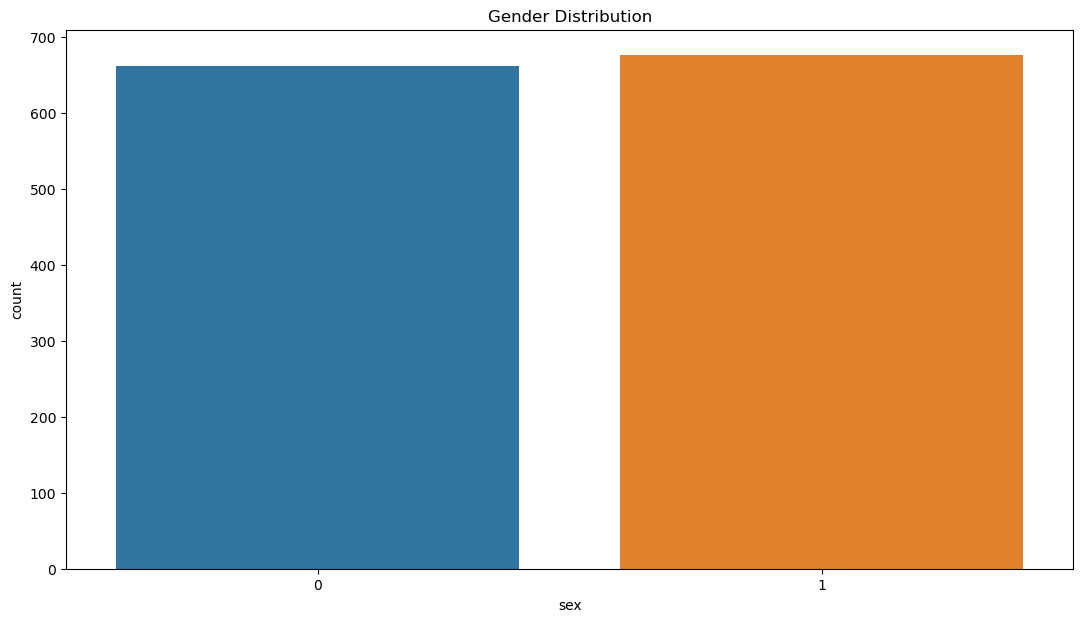

In [181]:
# checking Sex distribution
plt.figure(figsize=(13,7))
sns.countplot(x='sex',data=data)
plt.title('Gender Distribution')


***from the above graph the male and female are similar***

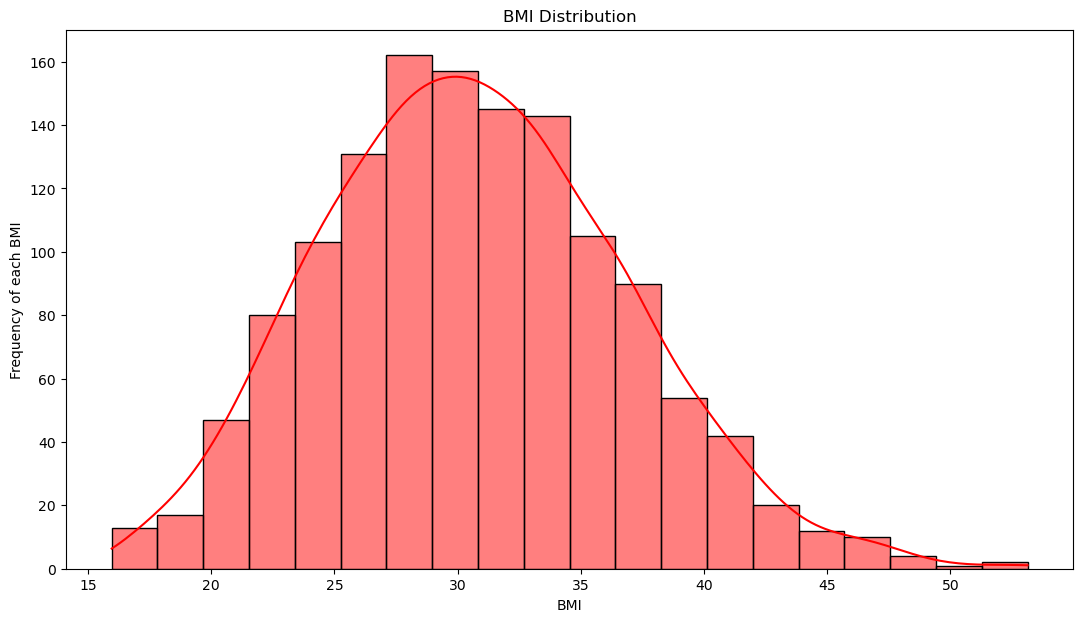

In [182]:
# checking bmi distribution
plt.figure(figsize=(13,7))
sns.histplot(data.bmi,bins=20,kde=True,color='red')

plt.title('BMI Distribution')
plt.xlabel('BMI')
plt.ylabel('Frequency of each BMI')
plt.show()

*** 

<Figure size 1300x700 with 0 Axes>

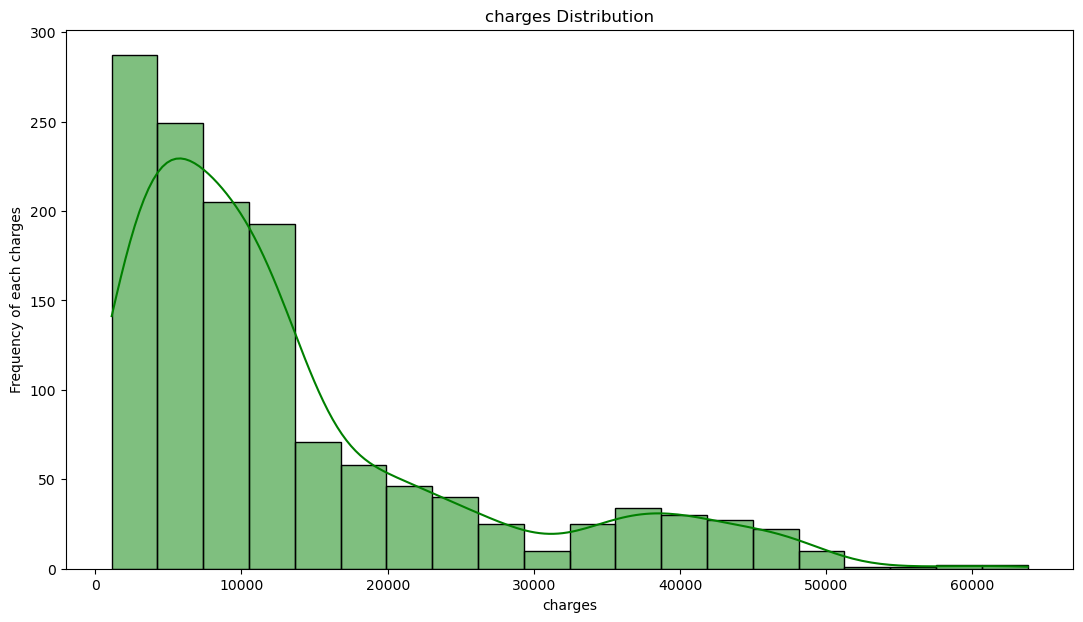

In [183]:
#checking charges prediction
plt.figure(figsize=(13,7))

plt.figure(figsize=(13,7))
sns.histplot(data.charges,bins=20,kde=True,color='green')

plt.title('charges Distribution')
plt.xlabel('charges')
plt.ylabel('Frequency of each charges')
plt.show()

### Most of people has insurance charges below 15000 with negligible number of patients having medical expense above 50000

<Figure size 1300x700 with 0 Axes>

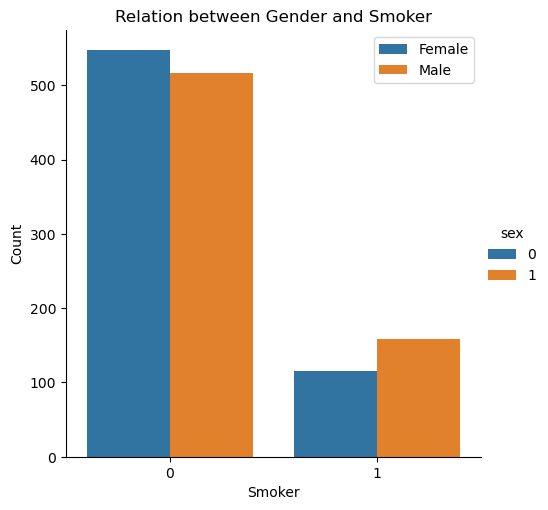

In [184]:
# Relation between Gender and Smoker

plt.figure(figsize=(13,7))
sns.catplot(x='smoker',kind='count',hue='sex',data=data)
plt.xlabel('Smoker')
plt.ylabel('Count')
plt.title('Relation between Gender and Smoker')
plt.legend(['Female','Male'])
plt.show()

**We can obeserve that male smokers are more in numbers so i will assume that medical treatment expense for male will be more than female**

<AxesSubplot:title={'center':'box plot for charges of women'}, xlabel='charges', ylabel='smoker'>

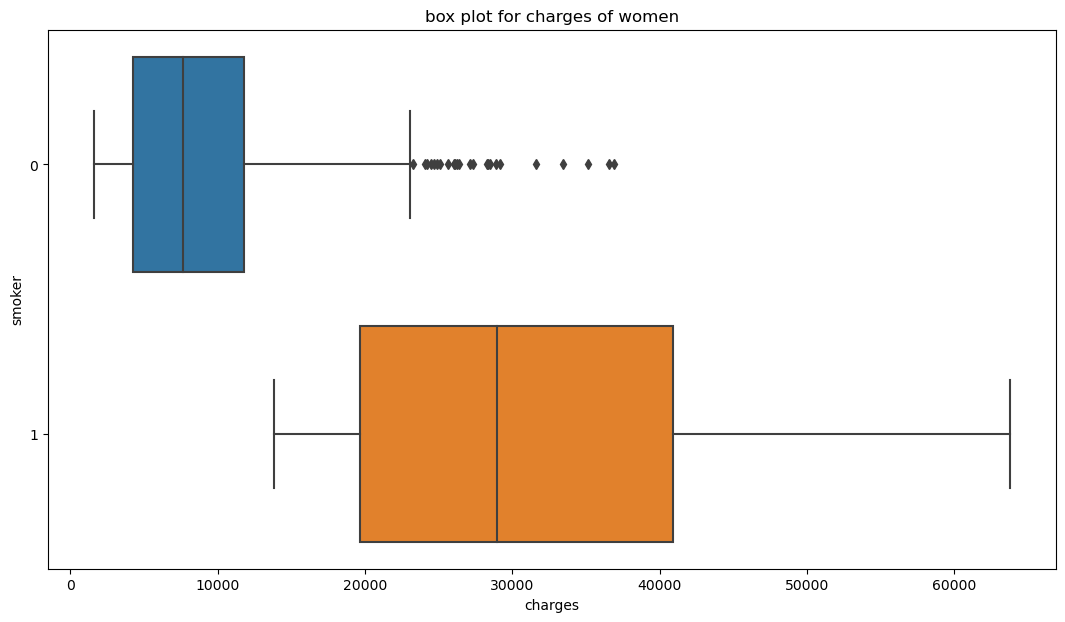

In [185]:
plt.figure(figsize=(13,7))
plt.title('box plot for charges of women')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==0)],orient='h')

<AxesSubplot:title={'center':'box plot for charges of male'}, xlabel='charges', ylabel='smoker'>

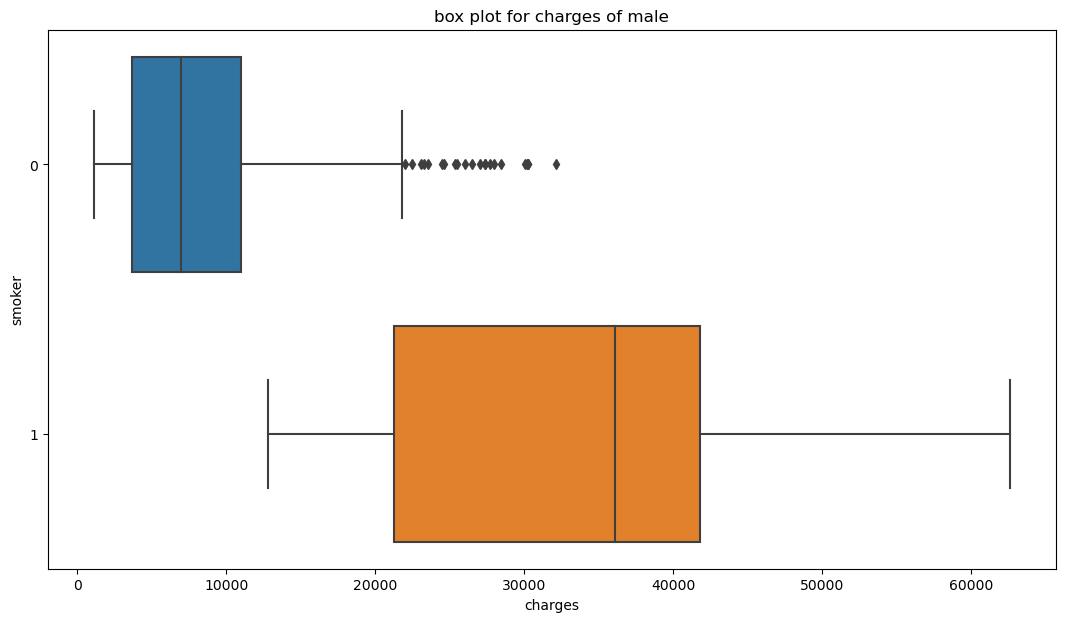

In [186]:
plt.figure(figsize=(13,7))
plt.title('box plot for charges of male')
sns.boxplot(y='smoker',x='charges',data=data[(data.sex==1)],orient='h')

*the assumption is true that the medical expense of males is greater than that of females. In addition to that medical expense of smokers is greater than that of non-smokers* 

In [187]:
cor = data.corr()
cor

,age,sex,bmi,children,smoker,region,charges
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.006308,0.299008
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,-0.012816,0.057292
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,-0.262754,0.198341
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.001205,0.067998
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,-0.038873,0.787251
region,0.006308,-0.012816,-0.262754,0.001205,-0.038873,1.000000,-0.039473
charges,0.299008,0.057292,0.198341,0.067998,0.787251,-0.039473,1.000000


<AxesSubplot:>

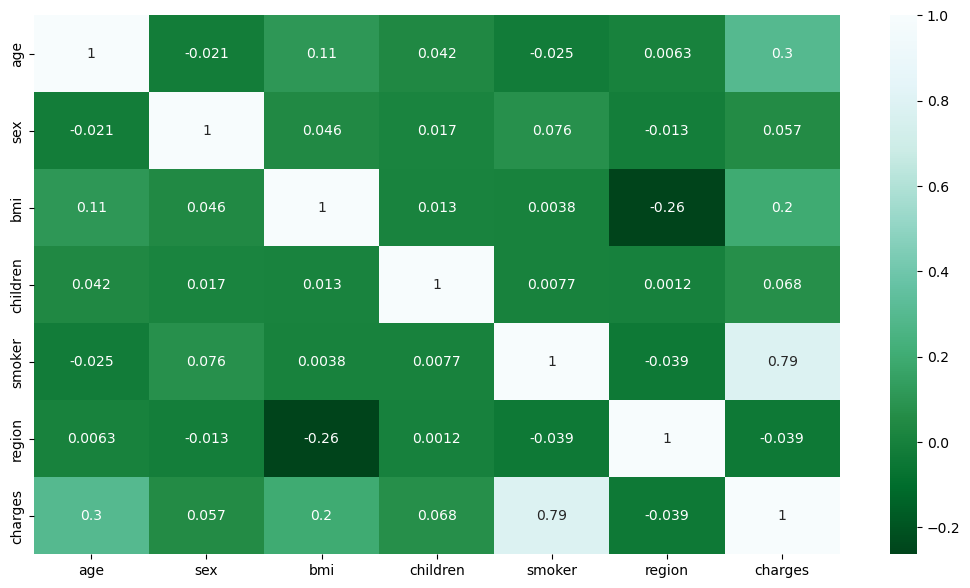

In [188]:
plt.figure(figsize=(13, 7))
sns.heatmap(cor, annot = True, cmap = 'BuGn_r')

**by analysing the heatmap we find that the smoker has more charges then of other features and region has no impact**

<Figure size 1300x700 with 0 Axes>

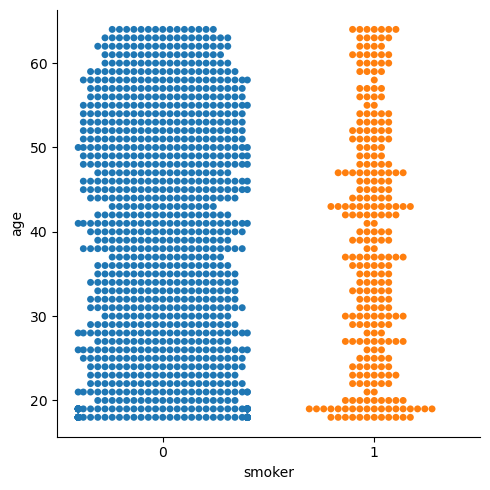

In [189]:
#rln b/w smokers and age distribution
plt.figure(figsize=(13, 7))
sns.catplot(x='smoker',y='age',kind='swarm',data=data)

### from the above graph, we can observe that there is significant numbers of smokers at the age 19

## multi variant analysis

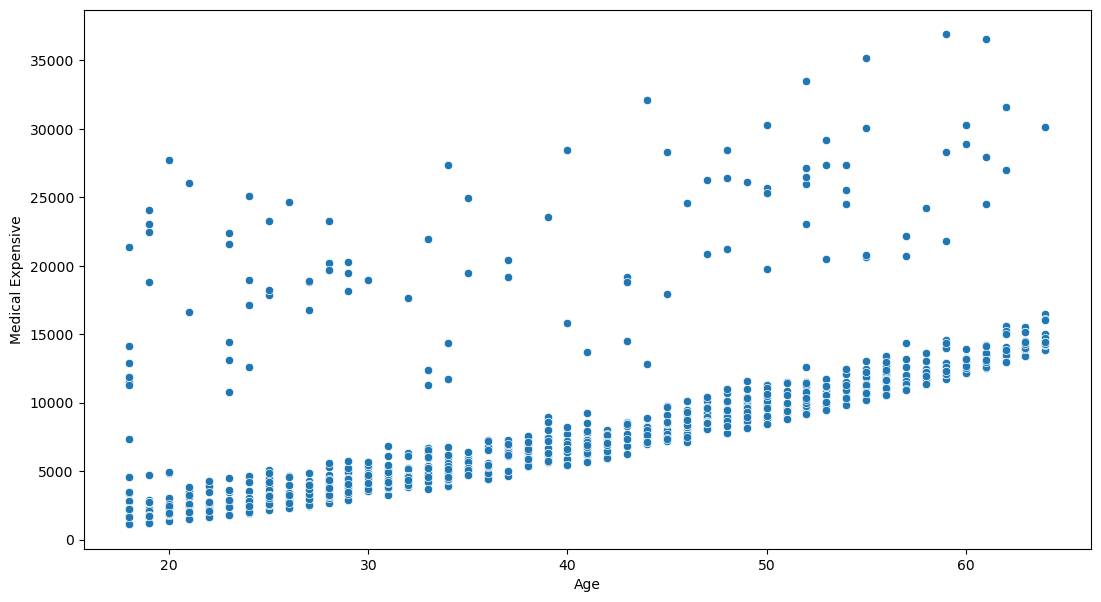

In [190]:
plt.figure(figsize=(13, 7))
sns.scatterplot(x='age',y='charges',data=data[(data.smoker==0)])
plt.xlabel('Age')
plt.ylabel('Medical Expensive')
plt.show()

**Majority of the points shows that medical expenses increases with the age which may due to the fact that older people are more prone to illmess. But thereare some outliers which show other illness or expenses which may lead to increase in medical expenses**

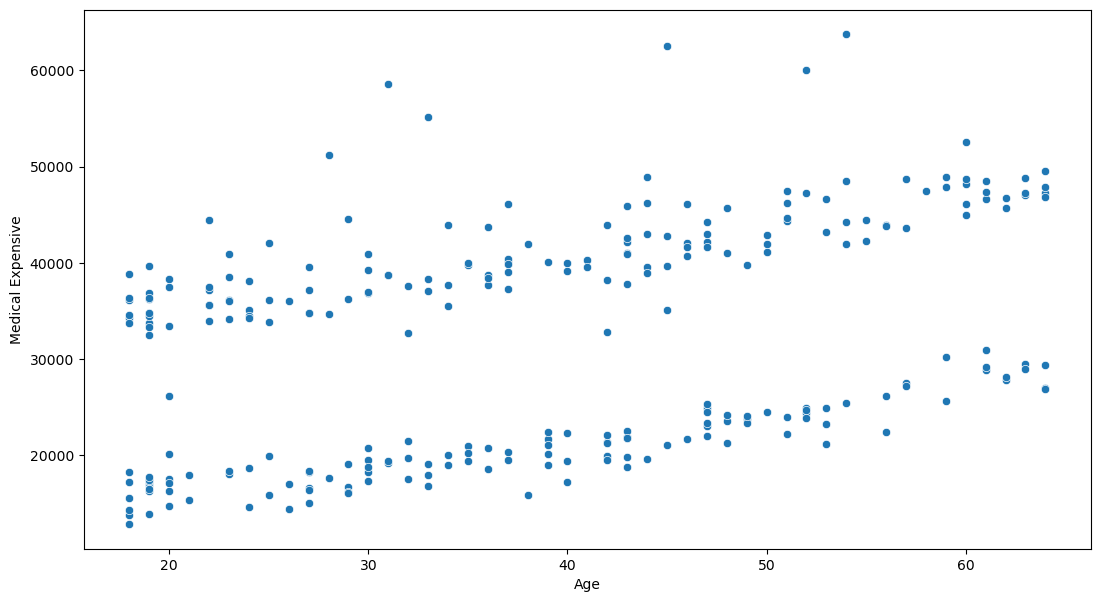

In [191]:
plt.figure(figsize=(13, 7))
sns.scatterplot(x='age',y='charges',data=data[(data.smoker==1)])
plt.xlabel('Age')
plt.ylabel('Medical Expensive')
plt.show()

**In this grapah there are two segments, one with high, medical expense which may due to the smoking related illness and other with low medical expenses which may due to age related illness**

**Now in order to get more we combined both the graphs**

<Figure size 1300x700 with 0 Axes>

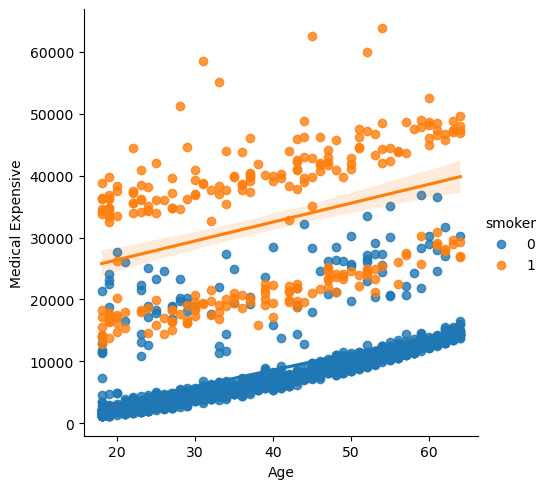

In [192]:
#age charges distribution

plt.figure(figsize=(13, 7))
sns.lmplot(x='age',y='charges',data=data,hue='smoker')
plt.xlabel('Age')
plt.ylabel('Medical Expensive')
plt.show()

**now we can clearly understand the variation in changes with respect to age and smoking habits.the medical expense of the smokers is higher than that of non smoker irrespective of age. In non smoker the cost of treatment increase with age which is obvious**

In [193]:
import warnings
warnings.filterwarnings('ignore')

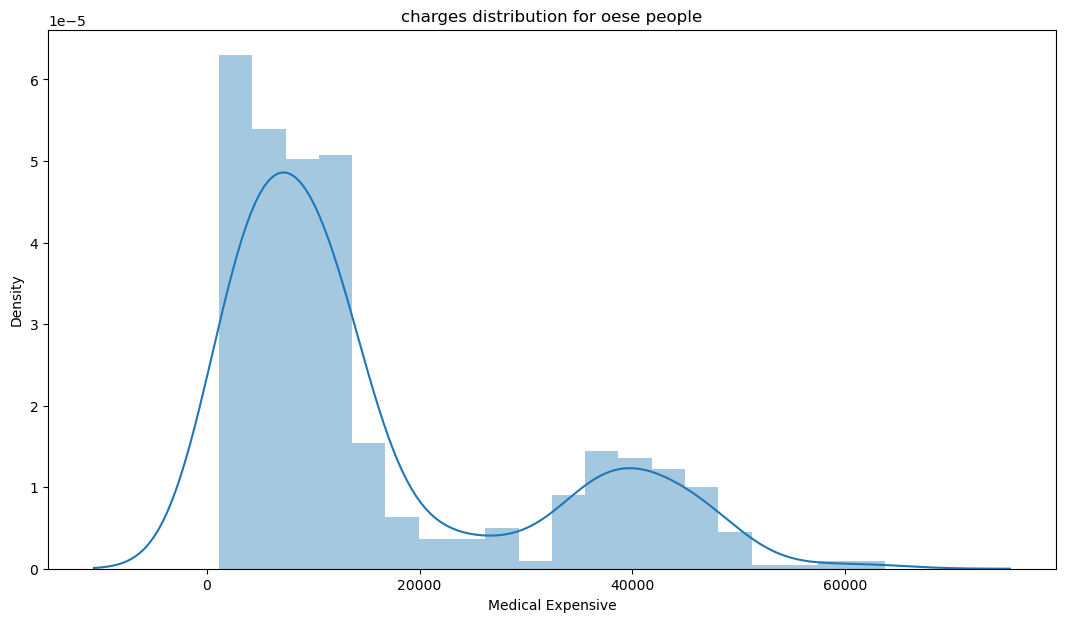

In [194]:
## realtion betwwn BMI and Medical expense
plt.figure(figsize=(13, 7))
sns.distplot(data[data.bmi>30]['charges'])
plt.title('charges distribution for oese people')
plt.xlabel('Medical Expensive')
plt.show()

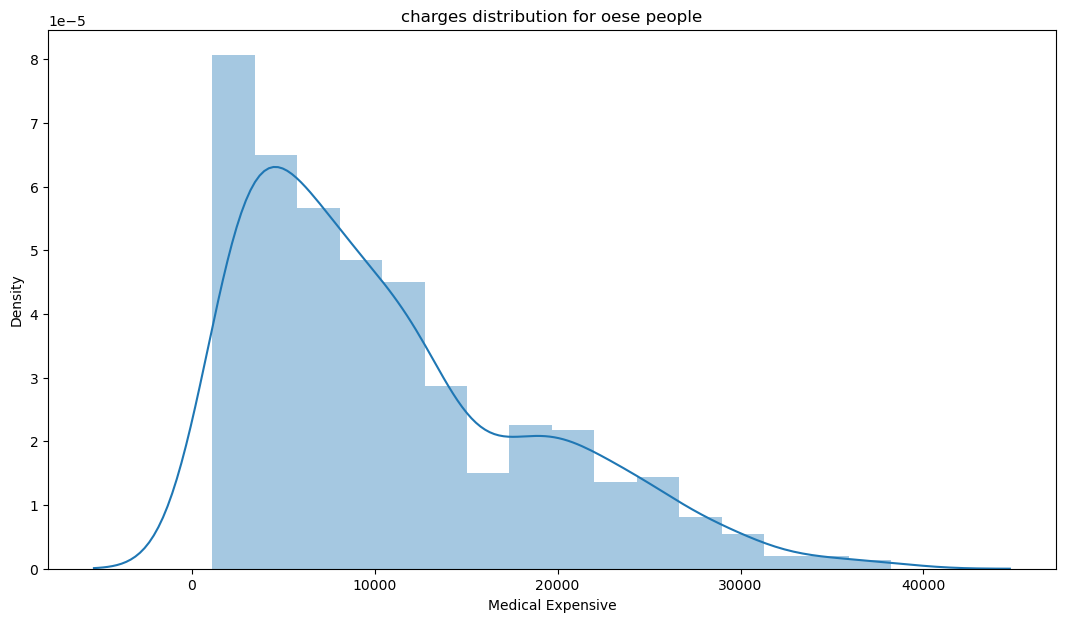

In [195]:
plt.figure(figsize=(13, 7))
sns.distplot(data[data.bmi<30]['charges'])
plt.title('charges distribution for oese people')
plt.xlabel('Medical Expensive')
plt.show()

**Therefore, people with BMI less than 30 are spending less wheras people with bmi more than 30 are spending more.**

 ## Model Building & Evaluation

#### Linear Regression

In [238]:
X=data.drop(['charges','region'],axis=1)
y=data.charges

In [239]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [240]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1003, 5), (1003,), (335, 5), (335,))

In [241]:
X_test

,age,sex,bmi,children,smoker
764,45,0,25.175,2,0
887,36,0,30.020,0,0
890,64,0,26.885,0,1
1293,46,1,25.745,3,0
259,19,1,31.920,0,1
...,...,...,...,...,...
342,60,0,27.550,0,0
308,58,1,34.865,0,0
1128,34,1,32.800,1,0
503,19,1,30.250,0,1


In [242]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression() 

reg.fit(X_train,y_train)

LinearRegression()

In [243]:
#making pridiction
y_pred = reg.predict(X_test)

In [244]:
y_pred

array([ 8.51676162e+03,  6.89385906e+03,  3.67761988e+04,  9.46438066e+03,
        2.67899225e+04,  1.10936342e+04,  1.49128837e+01,  1.68237415e+04,
        6.43734027e+02,  1.12091522e+04,  2.84914780e+04,  9.31642557e+03,
        5.36756204e+03,  3.85317525e+04,  4.03994299e+04,  3.72400044e+04,
        1.52908425e+04,  3.59824668e+04,  9.28372808e+03,  3.13154472e+04,
        4.26888952e+03,  1.04948927e+04,  2.66379317e+03,  6.45853253e+03,
        1.12164091e+04,  1.24458129e+04,  1.47987228e+04,  5.98242268e+03,
        9.50360619e+03,  2.31859179e+03,  9.43737627e+03,  1.29458564e+04,
        4.58198818e+03,  3.33952812e+03,  4.78782402e+03,  1.25054254e+04,
        2.24235935e+03,  9.10960670e+03,  3.31881458e+04,  3.27197321e+04,
        4.18213700e+03,  4.18988685e+03,  1.44226759e+04,  1.14470784e+04,
        8.92634882e+03,  1.25501051e+04,  5.04542241e+03,  3.46423514e+03,
        3.56618124e+04,  9.27103562e+03,  1.59719021e+04,  2.50117490e+03,
        1.21029904e+04,  

In [245]:
#Model Evaluation
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 4268.69663797491
RMSE: 5952.148688048979


In [246]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred) 

0.7652077247609824

### over model is able discribe 75% of our data

## Polynomial Regression

In [247]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
poly_reg

PolynomialFeatures()

In [256]:
#transform the features to higher degree
x_train_poly= poly_reg.fit_transform(X_train)

#spliting tha data
X_train, X_test, y_train, y_test = train_test_split(x_train_poly, y_train, test_size=0.25, random_state=42)

In [257]:
plr=LinearRegression()
plr.fit(X_train,y_train)


LinearRegression()

In [261]:
y_pred_plr=plr.predict(X_test)



In [259]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_plr))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_plr)))

MAE: 2960.6824657584098
RMSE: 4707.8297917177


In [260]:
 from sklearn.metrics import r2_score
r2_score(y_test, y_pred_plr) 

0.8418845002174472

**result of my model is able to explain 84% for the total data set**

In [268]:
#input the values
age=21
sex=1
bmi=27
children=0
smoker=1

In [269]:
charge=reg.predict([[age,sex,bmi,children,smoker]])
print('The charge of this new patient is $',charge[0])

The charge of this new patient is $ 25698.398959795322
